In [34]:
import pytesseract
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from copy import deepcopy

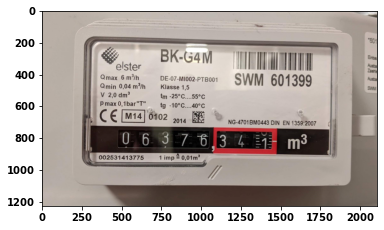

In [35]:
img_raw = cv.imread('gas_sample.jpg', cv.IMREAD_COLOR)
img_raw = cv.cvtColor(img_raw, cv.COLOR_BGR2RGB)  # opencv reads colors in BGR
plt.imshow(img_raw);

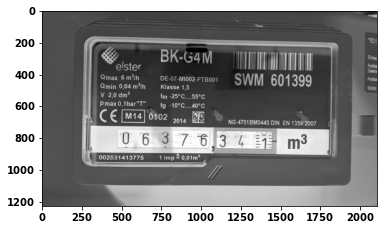

In [36]:
img_gray = cv.cvtColor(img_raw, cv.COLOR_RGB2GRAY)
img_inv = cv.bitwise_not(img_gray)
plt.imshow(img_inv, plt.cm.gray);

## Thresholding

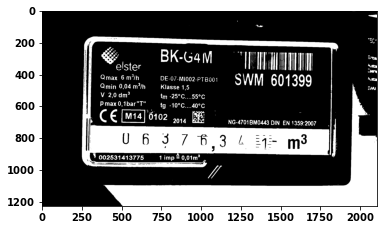

In [37]:
_, img_bin = cv.threshold(img_inv, thresh=125, maxval=255, type=cv.THRESH_BINARY)
plt.imshow(img_bin, plt.cm.gray);

len(contours)=639


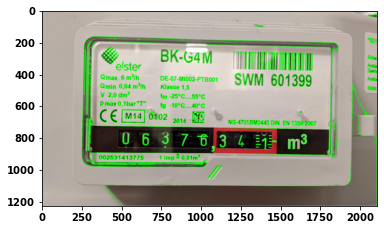

In [77]:
contours, _ = cv.findContours(img_bin, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print(f"{len(contours)=}")
img_copy = deepcopy(img_raw)
cv.drawContours(img_copy, contours, -1, (0, 255, 0), 2)
plt.imshow(img_copy);

## Single channel RGB trial
inspired by https://learnopencv.com/contour-detection-using-opencv-python-c/

In [55]:
imgs_rgb = cv.split(img_raw)
names = ("red", "green", "blue")

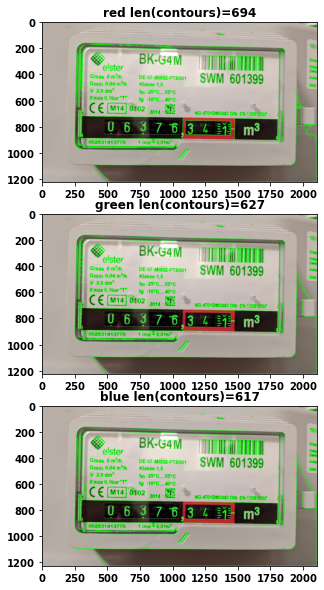

In [79]:
fig = plt.figure(figsize=(6, 10))
for i, img in enumerate(imgs_rgb):
    inv = cv.bitwise_not(img)
    _, bin = cv.threshold(inv, thresh=125, maxval=255, type=cv.THRESH_BINARY)
    contours, _ = cv.findContours(bin, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    img_copy = deepcopy(img_raw)
    cv.drawContours(img_copy, contours, -1, (0, 255, 0), 2)
    ax = fig.add_subplot(3, 1, i+1)
    ax.imshow(img_copy, plt.cm.gray)
    ax.set_title(f"{names[i]} {len(contours)=}")